In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Let's create some datasets

### Clasification Dataset

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X_class, y_class = make_classification(n_samples=1000, n_features=6, n_informative=3, n_redundant=3, random_state=1)
# summarize the dataset
print(X_class.shape, y_class.shape)

(1000, 6) (1000,)


#### Let's have a look at the dataset

In [3]:
df_X_class = pd.DataFrame(X_class, columns = ['feat_1','feat_2','feat_3', 'feat_4','feat_5','feat_6'])
df_X_class.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,0.167588,0.976565,-0.212454,1.802607,0.443981,0.513438
1,1.739900,-3.049808,-3.130676,-0.649672,-3.326107,-3.274714
2,1.270288,1.374430,0.401376,-0.834401,0.178329,-0.313340
3,-0.350649,-1.676080,-0.655255,-0.621510,-0.911394,-0.708872
4,0.422999,1.325872,-1.007056,3.784325,0.364637,0.596452


In [4]:
df_y_class = pd.DataFrame(y_class, columns = ['label'])
df_y_class.head(5)

,label
0,0
1,1
2,1
3,0
4,0


### Regression Dataset

In [5]:

# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=6, n_informative=3, random_state=1)
# summarize the dataset
print(X_reg.shape, y_reg.shape)

(1000, 6) (1000,)


#### Let's have a look at the dataset

In [6]:
df_X_reg = pd.DataFrame(X_reg, columns = ['feat_1','feat_2','feat_3', 'feat_4','feat_5','feat_6'])
df_X_reg.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,0.353870,-0.069625,-2.277298,-0.153236,-0.186955,-2.432509
1,-0.035368,0.920615,-1.873161,-1.306534,2.110605,0.076380
2,0.984352,-0.419085,0.363847,0.701654,1.065591,0.320101
3,-0.069329,0.608515,1.044994,0.450156,-0.108392,1.765335
4,0.599126,-1.442013,1.627997,-0.010331,-0.046240,1.870497


In [7]:
df_y_reg = pd.DataFrame(y_reg, columns = ['label'])
df_y_reg.head(5)

,label
0,-118.685583
1,-55.572500
2,4.988164
3,80.695182
4,22.482502


### All is good. So, now let's apply some feature importance selection to our datasets

### Information Gain

Feature: 0, Score: 0.18827
Feature: 1, Score: 0.18391
Feature: 2, Score: 0.06219
Feature: 3, Score: 0.37755
Feature: 4, Score: 0.08403
Feature: 5, Score: 0.11480


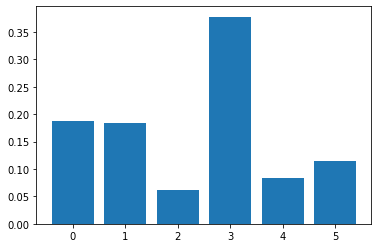

In [28]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_class,y_class)
feature_imp = pd.Series(importances, df_X_class.columns[0:len(df_X_class.columns)])
# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

### Chi-square Test

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# First for this method we should make sure that there is no negative number in our dataset
X_positive = np.absolute(X_class)
# choose the 2 features with the highest chi-squared statistics
chi2_features = SelectKBest(chi2, k=2)
data_kbest_features = chi2_features.fit_transform(X_positive, y_class)
print(data_kbest_features.shape[1])

2


#### Here if we print the selected features and compare it to the main dataset, we can see that feat_5 and feat_6 had the highest chi-seaured statistics

In [10]:
df_selected_features = pd.DataFrame(data_kbest_features, columns = ['new_feat_1','new_feat_2'])
df_selected_features

,new_feat_1,new_feat_2
0,0.443981,0.513438
1,3.326107,3.274714
2,0.178329,0.313340
3,0.911394,0.708872
4,0.364637,0.596452
...,...,...
995,0.772710,1.103890
996,0.065978,0.335857
997,0.182577,0.134304
998,0.383739,0.862031


#### Checking the correlation between the columns to see the equivalence

In [11]:
print(df_selected_features['new_feat_1'].corr(df_X_class['feat_5'].abs()))
print(df_selected_features['new_feat_2'].corr(df_X_class['feat_6'].abs()))


1.0
1.0


### Linear Regression Feature Importance


Feature: 0, Score: 5.04344
Feature: 1, Score: 44.68538
Feature: 2, Score: 51.53437
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000


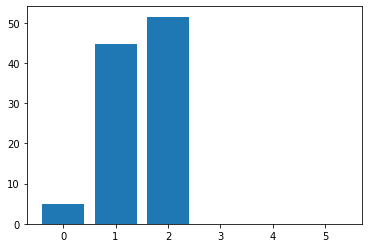

In [12]:
from sklearn.linear_model import LinearRegression
# define the model
model = LinearRegression()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Logistic Regression Feature Importance

Feature: 0, Score: 0.61895
Feature: 1, Score: 0.14768
Feature: 2, Score: 0.55526
Feature: 3, Score: -2.09236
Feature: 4, Score: -0.15559
Feature: 5, Score: -0.53758


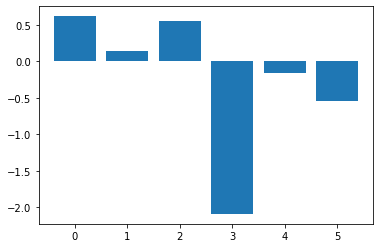

In [13]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_class, y_class)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### CART Regression Feature Importance


Feature: 0, Score: 0.00310
Feature: 1, Score: 0.41903
Feature: 2, Score: 0.57307
Feature: 3, Score: 0.00160
Feature: 4, Score: 0.00144
Feature: 5, Score: 0.00176


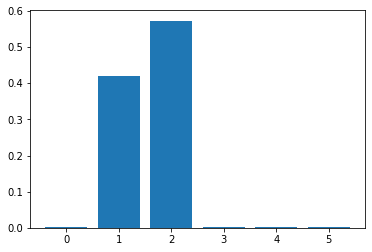

In [17]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### CART Classification Feature Importance

Feature: 0, Score: 0.10326
Feature: 1, Score: 0.16240
Feature: 2, Score: 0.02174
Feature: 3, Score: 0.61076
Feature: 4, Score: 0.07491
Feature: 5, Score: 0.02693


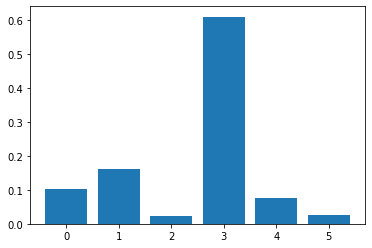

In [18]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_class, y_class)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random Forest Regression Feature Importance


Feature: 0, Score: 0.00362
Feature: 1, Score: 0.41648
Feature: 2, Score: 0.57376
Feature: 3, Score: 0.00215
Feature: 4, Score: 0.00205
Feature: 5, Score: 0.00193


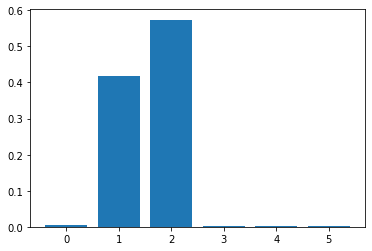

In [19]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random Forest Classification Feature Importance

Feature: 0, Score: 0.18903
Feature: 1, Score: 0.13762
Feature: 2, Score: 0.07377
Feature: 3, Score: 0.43757
Feature: 4, Score: 0.07228
Feature: 5, Score: 0.08973


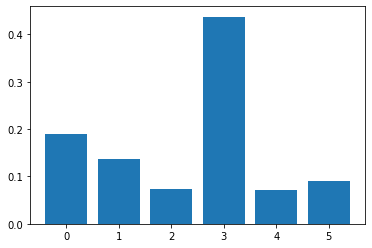

In [21]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_class, y_class)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XGBoost Feature Importance


Feature: 0, Score: 0.00329
Feature: 1, Score: 0.37285
Feature: 2, Score: 0.62154
Feature: 3, Score: 0.00065
Feature: 4, Score: 0.00068
Feature: 5, Score: 0.00099


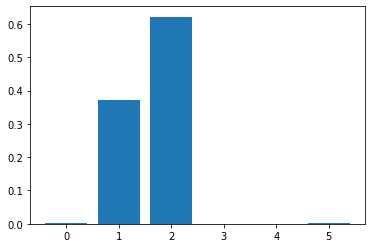

In [25]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XGBoost Classification Feature Importance

[13:02:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.09511
Feature: 1, Score: 0.10446
Feature: 2, Score: 0.05578
Feature: 3, Score: 0.53097
Feature: 4, Score: 0.11616
Feature: 5, Score: 0.09752


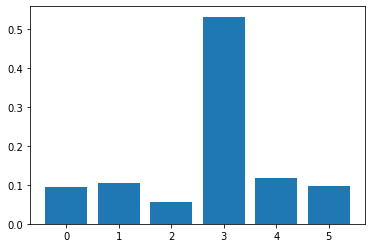

In [26]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
# define the model
model = XGBClassifier()
# fit the model
model.fit(X_class, y_class)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Permutation Feature Importance for Regression


In [ ]:

# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_reg, y_reg)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Permutation Feature Importance for Classification


In [ ]:

# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_class, y_class)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()